## Exercise 2

The deviation from the nominal center to center distance of a piston rod is known to be characterized by:
- $\mu = 0.4417$ μm
- $\sigma = 3.4914$ μm

A sample of size $n=5$ is acquired on a daily basis. The measurements of 25 consecutive days are reported in the file `ESE09_ex2.csv`.

1. Design a Xbar-S control chart for the process. 
2. Design a CUSUM control chart ($h=4, k=0.5$). 
3. Design an EWMA control chart ($\lambda=0.2$).

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = pd.read_csv('ESE09_ex2.csv')

# Inspect the dataset
data.head()

,X1,X2,X3,X4,X5
0,1.2102,-0.5621,-0.7336,4.6353,-2.4700
1,-0.5686,3.6728,5.1017,-3.3084,3.0759
2,-1.6336,1.3034,-1.2234,0.2847,-3.0211
3,2.8496,-8.4910,4.1368,-3.2575,4.1078
4,4.4853,0.6767,-0.6653,3.6053,3.5055


Visualize the dataset.

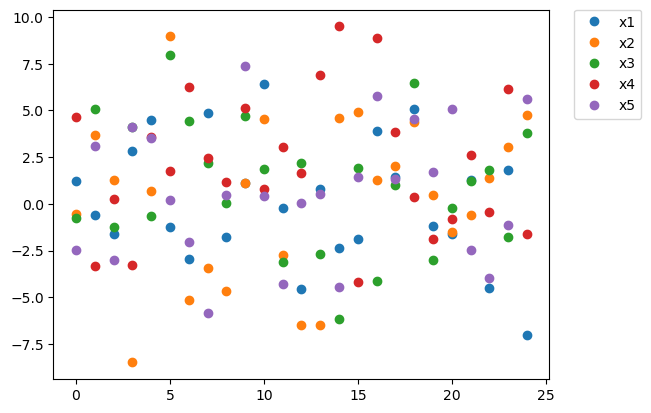

In [2]:
# Make a scatter plot of all the columns against the index
plt.plot(data['X1'], linestyle='none', marker='o', label = 'x1')
plt.plot(data['X2'], linestyle='none', marker='o', label = 'x2')
plt.plot(data['X3'], linestyle='none', marker='o', label = 'x3')
plt.plot(data['X4'], linestyle='none', marker='o', label = 'x4')
plt.plot(data['X5'], linestyle='none', marker='o', label = 'x5')
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Point 1
Design a Xbar-S control chart for the process.

Check if the data is normally distributed.

p-value of the Shapiro-Wilk test: 0.841


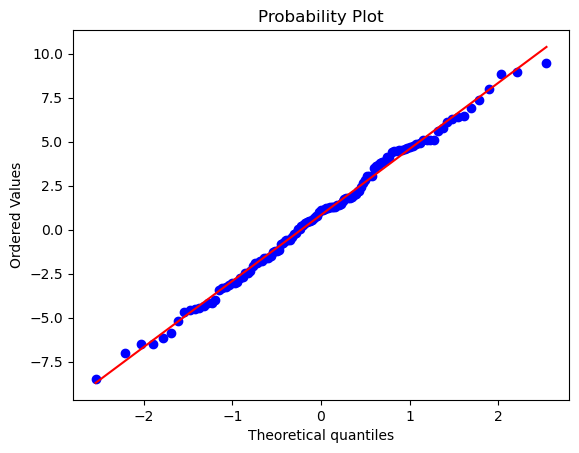

In [3]:
# Stack the data into a single column
data_stack = data.stack()

# Check the normality assumption
# We can use the Shapiro-Wilk test
_, p_value_SW = stats.shapiro(data_stack)
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(data_stack, dist="norm", plot=plt)
plt.show()

No information is given about the acquisition order of the data. Randomness is only qualitatively assessed from the scatter plot. Let's design an Xbar-S control chart for the process.

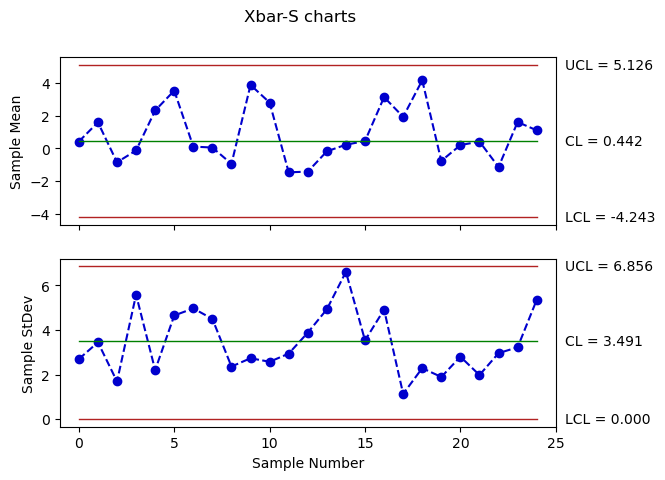

In [4]:
# Input the known mean and standard deviation
mean = 0.4417
stdev = 3.4914
n = 5

data_XS = qda.ControlCharts.XbarS(data, mean = mean, sigma = stdev)

The process is in control.

### Point 2
Design a CUSUM control chart ($h=4, k=0.5$) and a CUSUM FIR chart.

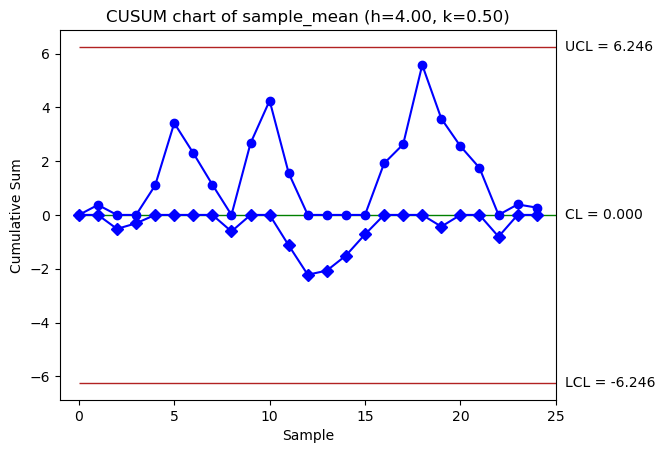

In [5]:
# input the parameters of the CUSUM control chart
h = 4
k = 0.5

# extract the sample_mean column from data_XS and put it in a new dataframe
data_mean = pd.DataFrame(data_XS['sample_mean'])

# Design the CUSUM control chart
data_CUSUM = qda.ControlCharts.CUSUM(data_mean, 'sample_mean', params=(h,k), mean = mean, sigma_xbar = stdev/np.sqrt(n))

### Point 3
Design an EWMA control chart ($\lambda=0.2$).

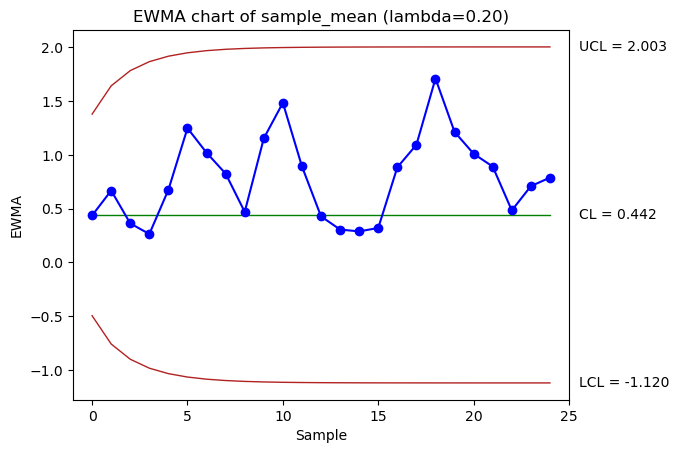

In [6]:
# Input the parameters of the EWMA control chart
lambda_ = 0.2

# Design the EWMA control chart
data_EWMA = qda.ControlCharts.EWMA(data_mean, 'sample_mean', params=(lambda_), mean = mean, sigma_xbar = stdev/np.sqrt(n))

## Exercise 2.1
Import the 5 additional samples that were collected in phase 2. Determine if the process is still in control using the three control charts. 

In [7]:
# Import the dataset
data_p2 = pd.read_csv('ESE09_ex2_phase2.csv')
data_p2.head()

,X1,X2,X3,X4,X5
0,3.8871,-0.8182,3.6395,4.5988,8.86949
1,3.9634,-5.1245,1.6469,5.7935,2.23434
2,3.2074,0.2740,4.4500,-4.2358,5.71082
3,6.7545,9.4610,6.6967,-0.3139,0.92709
4,-0.2426,3.7593,7.0754,7.5853,-2.80609


In [8]:
phase1_size = len(data)
print(phase1_size)

25


In [9]:
data_all = pd.concat([data, data_p2], ignore_index=True)

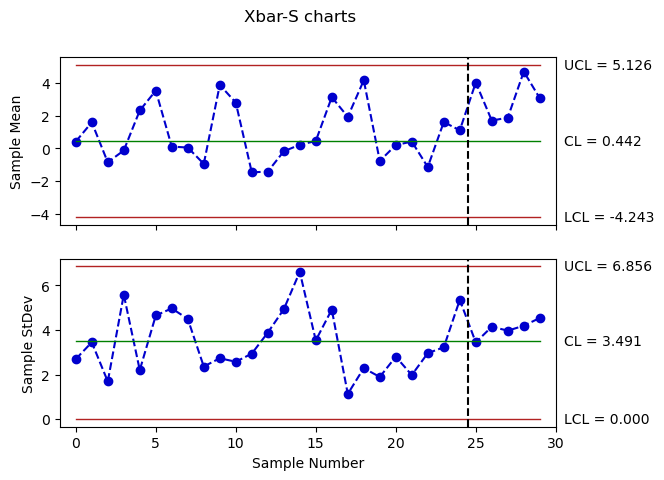

In [10]:
data_XS = qda.ControlCharts.XbarS(data_all, mean = mean, sigma = stdev, subset_size = phase1_size)

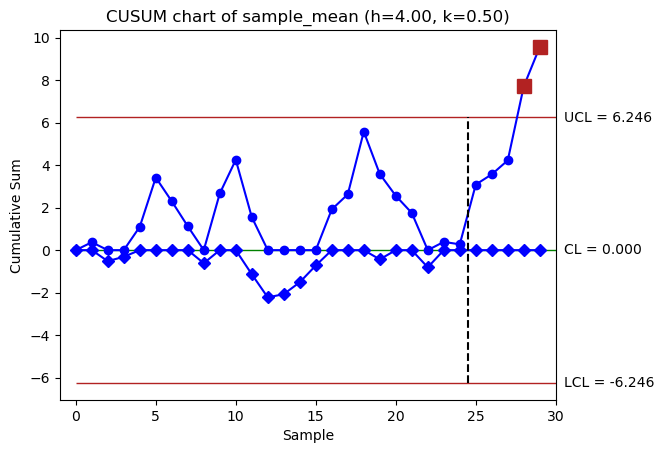

In [11]:
# extract the sample_mean column from data_XS and put it in a new dataframe
data_mean = pd.DataFrame(data_XS['sample_mean'])

# Design the CUSUM control chart
data_CUSUM = qda.ControlCharts.CUSUM(data_mean, 'sample_mean', params=(h,k), mean = mean, sigma_xbar = stdev/np.sqrt(n), subset_size=phase1_size)

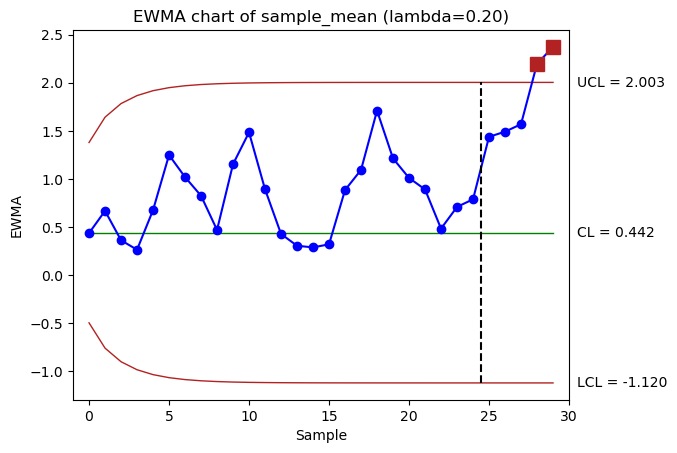

In [12]:
data_EWMA = qda.ControlCharts.EWMA(data_mean, 'sample_mean', params=(lambda_), mean = mean, sigma_xbar = stdev/np.sqrt(n), subset_size=phase1_size)